In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import PIL
import gc
import psutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
from tqdm import tqdm
from math import ceil
import math
import sys
import gc

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Input
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from tensorflow.keras.activations import softmax
from tensorflow.keras.activations import elu
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from tqdm import tqdm

gc.enable()

print(os.listdir("./APTOS/"))

['test.csv', 'test_images', 'test_resized_images', 'train.csv', 'train_images', 'train_images_new', 'train_resized_images']


In [2]:
SEED = 7
np.random.seed(SEED)
tensorflow.random.set_seed(SEED)
dir_path = "./APTOS/"
IMG_DIM = 299  # 224 399 #
BATCH_SIZE = 12
CHANNEL_SIZE = 3
NUM_EPOCHS = 60
TRAIN_DIR = '.train_resized_images/'
TEST_DIR = '.test_resized_images/'
FREEZE_LAYERS = 2  # freeze the first this many layers for training
CLASSS = {0: "No DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferative DR"}

In [3]:
df_train = pd.read_csv(os.path.join(dir_path, "train.csv"))
df_test = pd.read_csv(os.path.join(dir_path, "test.csv"))
NUM_CLASSES = df_train['diagnosis'].nunique()

In [4]:
print("Training set has {} samples and {} classes.".format(df_train.shape[0], df_train.shape[1]))
print("Testing set has {} samples and {} classes.".format(df_test.shape[0], df_test.shape[1]))

Training set has 3662 samples and 2 classes.
Testing set has 1928 samples and 1 classes.


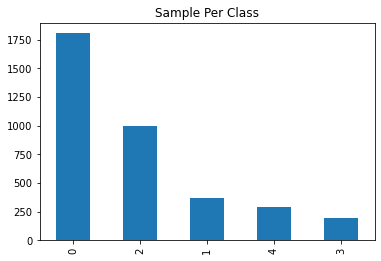

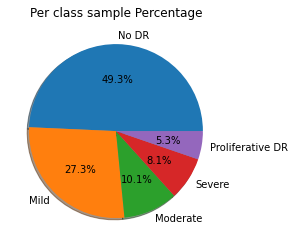

In [5]:
chat_data = df_train.diagnosis.value_counts()
chat_data.plot(kind='bar');
plt.title('Sample Per Class');
plt.show()
plt.pie(chat_data, autopct='%1.1f%%', shadow=True, labels=["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"])
plt.title('Per class sample Percentage');
plt.show()

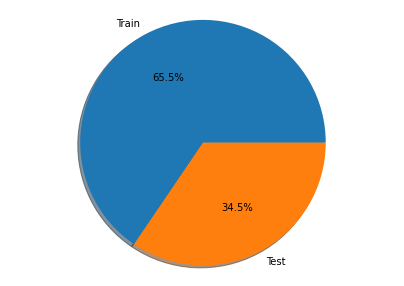

In [6]:
# Train & Test samples ratio
# Plot Data
labels = 'Train', 'Test'
sizes = df_train.shape[0], df_test.shape[0]
colors = 'lightskyblue', 'lightcoral'
# Plot
plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df_train.id_code, df_train.diagnosis, test_size=0.2,
                                                    random_state=SEED, stratify=df_train.diagnosis)

In [8]:
def draw_img(imgs, target_dir, class_label='0'):
    fig, axis = plt.subplots(2, 6, figsize=(15, 6))
    for idnx, (idx, row) in enumerate(imgs.iterrows()):
        imgPath = os.path.join(dir_path, f"{target_dir}/{row['id_code']}.png")
        img = cv2.imread(imgPath)
        row = idnx // 6
        col = idnx % 6
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axis[row, col].imshow(img)
    plt.suptitle(class_label)
    plt.show()

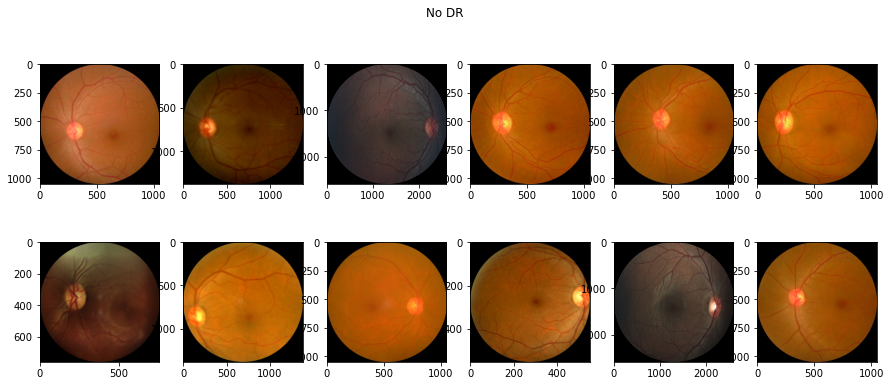

In [9]:
CLASS_ID = 0
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(12), 'train_resized_images', CLASSS[CLASS_ID])

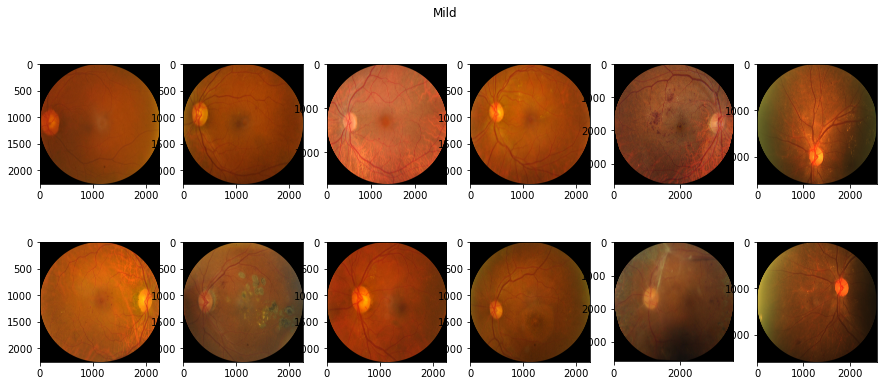

In [10]:
CLASS_ID = 1
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(12), 'train_resized_images', CLASSS[CLASS_ID])

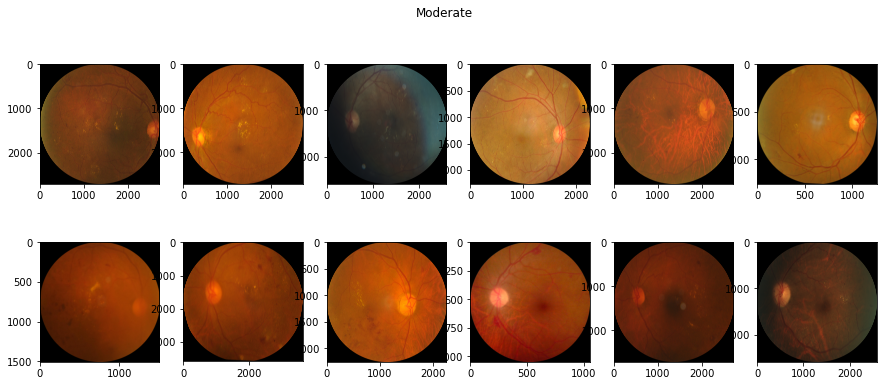

In [11]:
CLASS_ID = 2
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(12), 'train_resized_images', CLASSS[CLASS_ID])

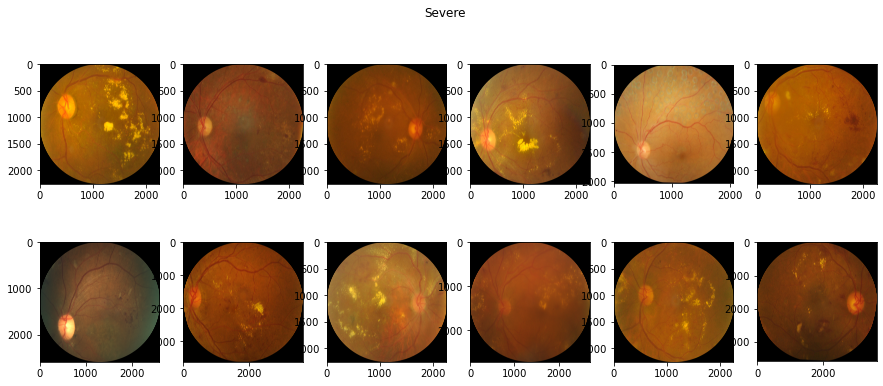

In [12]:
CLASS_ID = 3
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(12), 'train_resized_images', CLASSS[CLASS_ID])

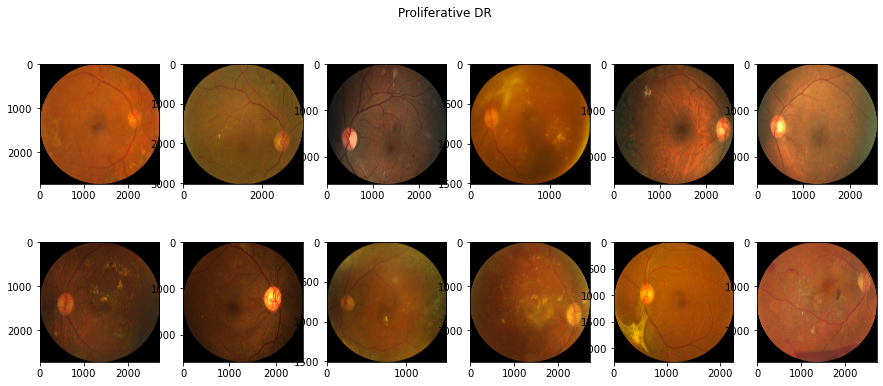

In [13]:
CLASS_ID = 4
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(12), 'train_resized_images', CLASSS[CLASS_ID])

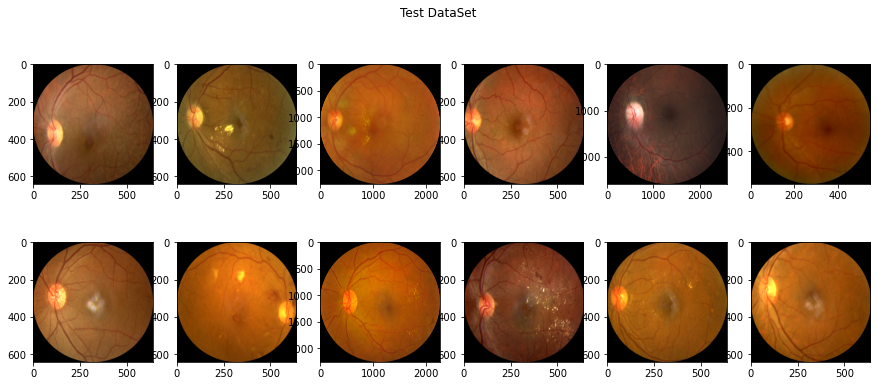

In [15]:
CLASS_ID = 'Test DataSet'
draw_img(df_test.sample(12, random_state=SEED), 'test_resized_images', CLASS_ID)